In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

In [2]:
pal = sns.color_palette(palette='icefire')
pal_energy      = pal[1]
pal_energy_best = pal[0]
pal_runtime     = pal[5]

In [3]:
def twin_plot(df):
    fig = plt.figure()

    ax = sns.barplot(x=range(1, len(df)+1), y=df['energy'], label='Energy (J)', legend=False, color=pal_energy)
    axt = ax.twinx()
    sns.lineplot(x=range(0, len(df)), y=df['runtime'], label='Runtime (s)', legend=False, linewidth=2.5, color=pal_runtime, ax=axt)

    ax.set_ylim((0,None))
    axt.set_ylim((0,None))
    axt.grid(False)

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=range(0, len(df)), y=df['energy'], yerr=df['energysd'], fmt='none', c='black', linewidth=2)

    for bar in ax.patches:
        if bar.get_height() == df['energy'].min():
            bar.set_color(pal_energy_best)
            break

    ax.set_xlabel('#Threads')
    ax.set_ylabel('Energy (J)')
    axt.set_ylabel('Runtime (s)')

    fig.tight_layout()

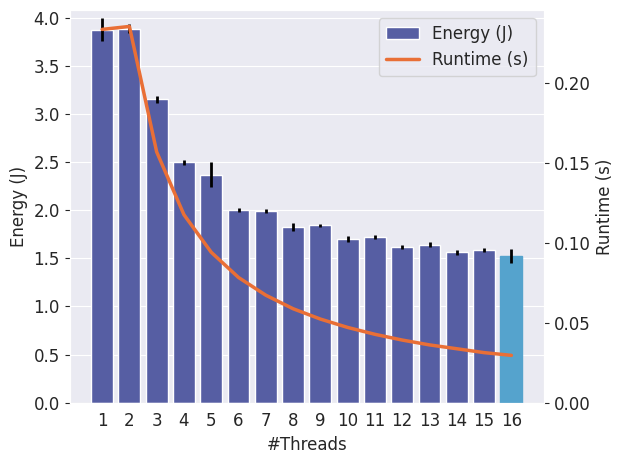

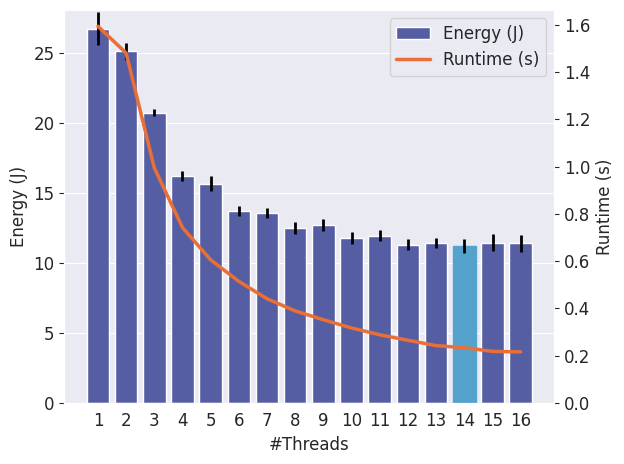

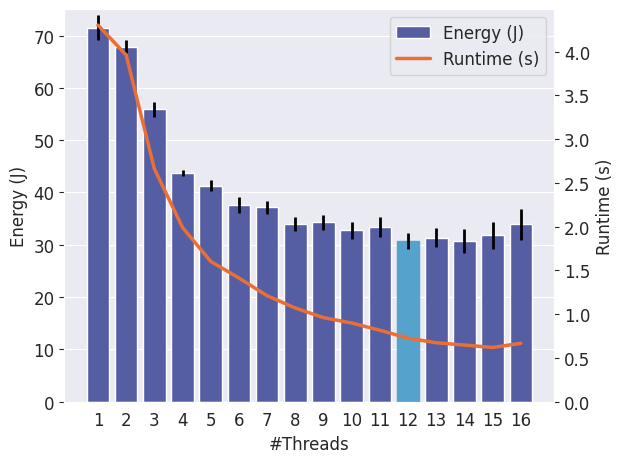

In [4]:
df = pd.read_csv('data/threads_nbody.csv')
for size in df['size'].unique():
    twin_plot(df[df['size'] == size])
    plt.savefig(f'images/nbody_{size}.png', bbox_inches='tight', dpi=300)
    plt.show()

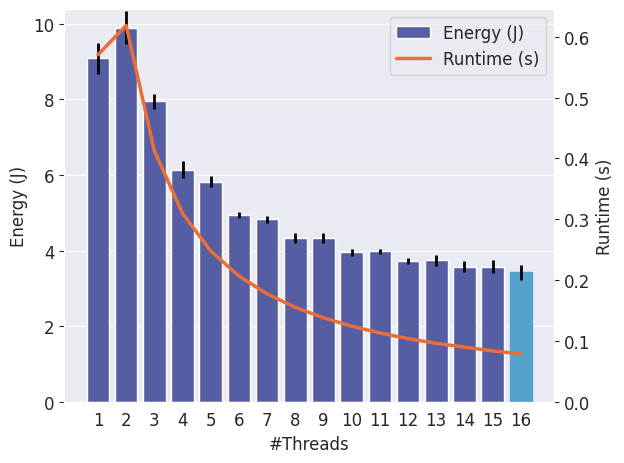

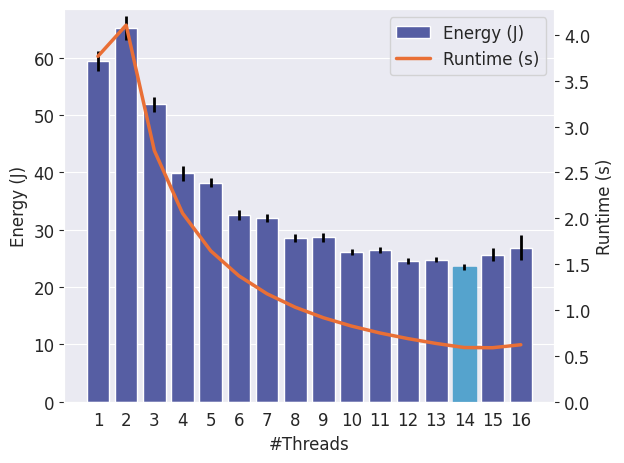

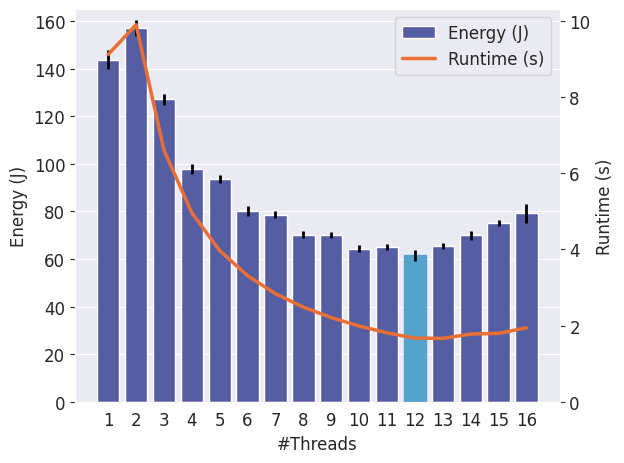

In [5]:
df = pd.read_csv('data/threads_stencil.csv')
for size in df['size'].unique():
    twin_plot(df[df['size'] == size])
    plt.savefig(f'images/stencil_{size}.png', bbox_inches='tight', dpi=300)
    plt.show()

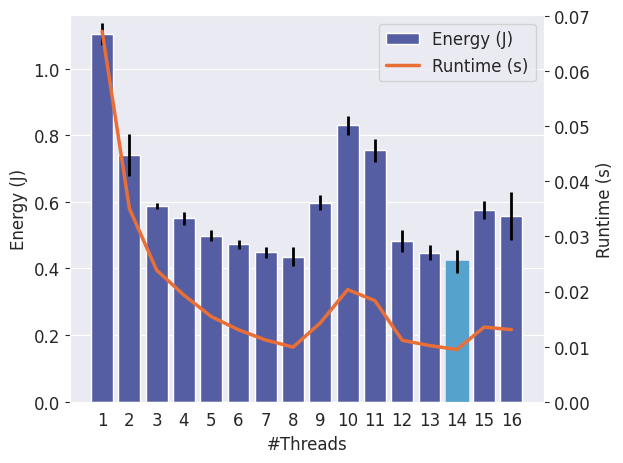

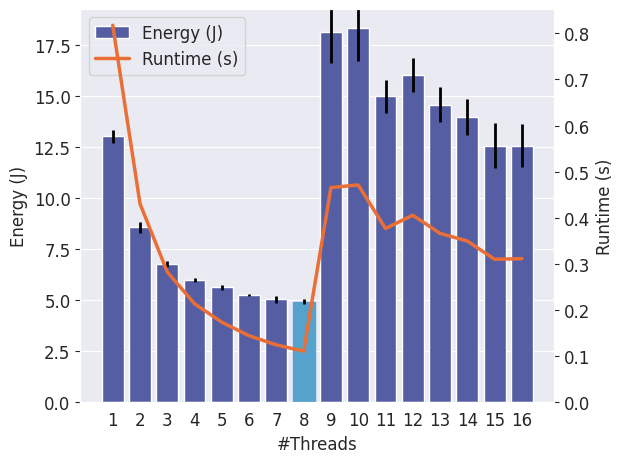

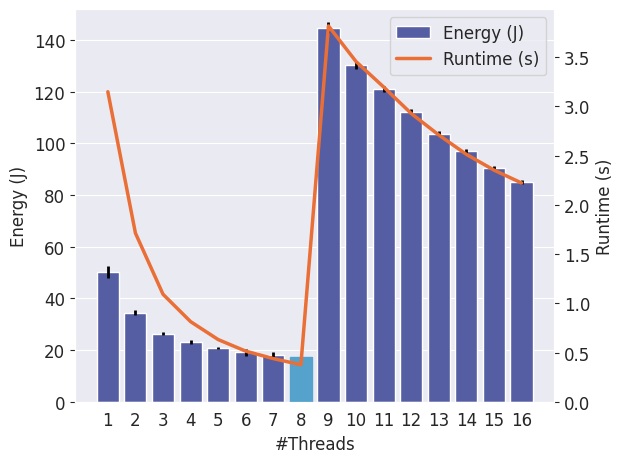

In [6]:
df = pd.read_csv('data/threads_matmul.csv')
for size in df['size'].unique():
    twin_plot(df[df['size'] == size])
    plt.savefig(f'images/matmul_{size}.png', bbox_inches='tight', dpi=300)
    plt.show()

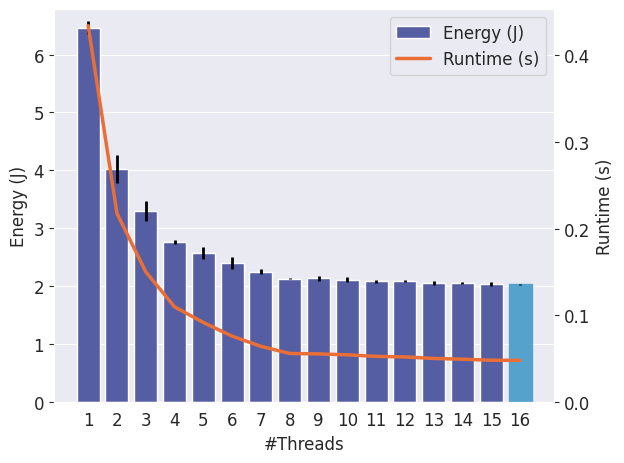

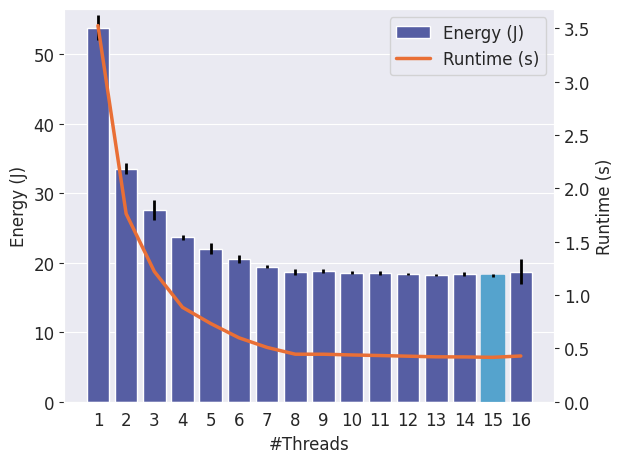

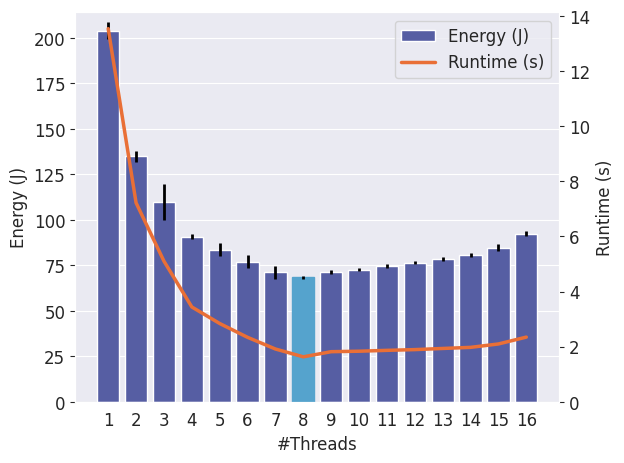

In [7]:
df = pd.read_csv('data/threads_rust.csv')
for size in df['size'].unique():
    twin_plot(df[df['size'] == size])
    plt.savefig(f'images/rust_{size}.png', bbox_inches='tight', dpi=300)
    plt.show()